# Telecom Churn - Identificação de perfil e sugestão de melhorias

Este projeto tem como objetivo a análise dos dados presentes em https://www.kaggle.com/blastchar/telco-customer-churn. Iremos estudar o perfil dos clientes que tem maior probabilidade de evasão e estruturar insights de melhorias dos serviços ofertados pela empresa de Telecomunicações a fim de aumentar sua taxa de retenção de cliente.

As analises realizadas neste projeto serão exploratórias e a ferramenta a ser utilizada será o Python 3.

In [1]:
# Importando bibliotecas de interesse

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Leitura do csv a ser analisado
dfi = pd.read_csv(r'C:\Users\hensa\Python files\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Vizualização da tabela para compreensão dos dados presentes
dfi.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Verificação do tipo de dado em cada coluna (e se algo precisa ser ajustado)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
# 'TotalCharges' é um valor de cobrança numérica e deveria ser do tipo float, precisamos corrigir isto

dfi['TotalCharges'] = pd.to_numeric(dfi['TotalCharges'], errors="coerce")
dfi[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [6]:
# Agora verificamos se há valores nulos na tabela

dfi.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Como há pouca informação nula, vamos exclui-lá da tabela (sem perder significânica estatística)
 
dfi.drop(dfi[dfi['TotalCharges'].isnull()].index, inplace=True)
dfi.reset_index(drop=True, inplace=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
# Com os dados limpos, vamos dar uma olhada em cada categoria e contar seus valores

for j in dfi:
    print(j)
    print(dfi[j].value_counts())
    print(".......")
    print(".......")

customerID
7427-AUFPY    1
1163-VIPRI    1
8338-QIUNR    1
3027-YNWZU    1
8215-NGSPE    1
             ..
0019-GFNTW    1
7251-LJBQN    1
0430-IHCDJ    1
2229-DPMBI    1
8627-ZYGSZ    1
Name: customerID, Length: 7032, dtype: int64
.......
.......
gender
Male      3549
Female    3483
Name: gender, dtype: int64
.......
.......
SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
.......
.......
Partner
No     3639
Yes    3393
Name: Partner, dtype: int64
.......
.......
Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64
.......
.......
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
.......
.......
PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
.......
.......
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
.......
.......
InternetService
Fiber optic    30

Aqui já verificamos nossas primeiras informações importantes:
    
    1. Maior parcela da população não é idosa (83,86%);
    2. Maioria não possui dependentes (70,15%);
    3. Praticamente todos possuem serviço de telefone (90,33%);
    4. Maioria possui serviço de internet (78,39%);
    5. Praticamente a mesma quantidade de pessoas possui Segurança online, Backup online, Proteção de dispositivo e Suporte técnico, porém ainda há mais pessoas que não possuem estes serviços;
    6. O número de pessoas com Streming de TV e Filmes também é similar;
    7. Maioria dos clientes (59,27%) preferem cobranças sem papel;
    8. O método de pagamento mais utilizado é o cheque eletrônico (33,6%), enquanto os outros 3 métodos possuem número igual de usuários (~22,18%);
    9. De maneira global, a taxa de evasão é de 26,58%. 

In [9]:
# Como não nos importa o ID do usuário, iremos retirar essa informação de nossa tabela
# Para manter a integridade dos dados, o dataframe initial (dfi) será substituído por dataframe analysis (dfa)

dfa = dfi.drop("customerID", axis = 1)

dfa.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Agora iremos dividir os dados de acordo com suas semelhanças (buscando analisar, custos, demografia, preferências do serviço, etc...) e plotaremos estas informações contra Churn para verificar a probabilidade do cliente deixar de usar o serviço contratado. Olharemos as seguintes informações em conjunto:
    
    1. gender, SeniorCitizen, Partner e Dependents (dados 'demográficos');
    2. PhoneService, MultipleLines e InternetService (tipos de serviços contratados);
    3. OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport (segurança e suporte);
    4. StreamingTV e StreamingMovies (serviços de streaming);
    5. Contract, PaperlessBilling e PaymentMethod (informações contratuais e de pagamento);
    6. Tenure, MonthlyCharges e TotalCharges (informações financeiras).
    
Com isso espero conseguir entender um pouco melhor que tipo de publico estamos lidando e suas preferências. 

## 1. Dados demográficos

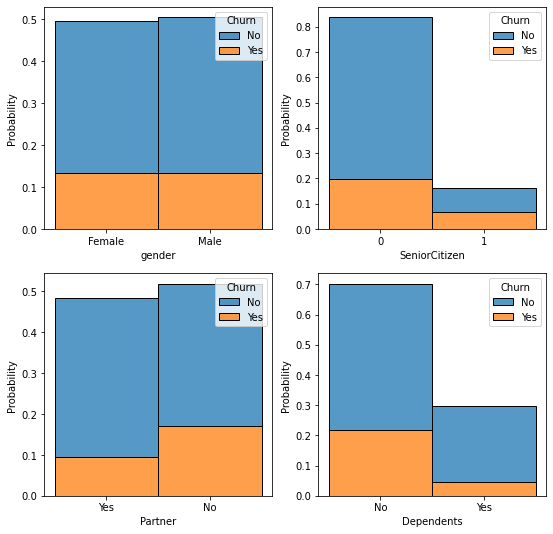

In [10]:
# Plotaremos gender, SeniorCitizen, Partner e Dependents para análise
# Primeiro criamos uma figura com 4 gráficos e depois iremos assimilar os valores de acordo com sua posição
# Este método será repetido para todas as analises que realizaremos para padronizar a visualização dos dados

fig1, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=dfa, x="gender", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[0,0])
sns.histplot(data=dfa, x="SeniorCitizen", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[0,1]).set(xticks=[0,1])
sns.histplot(data=dfa, x="Partner", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[1,0])
sns.histplot(data=dfa, x="Dependents", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[1,1])

plt.show()

### Observações

1. Não há diferença de Churn entre homens e mulheres;
2. Existe uma chance de ~25% de pessoas jovens deixar o serviço, enquanto para os idosos a chance é de ~40%;
3. Há pouca influência a pessoa ser casada ou não quanto ao Churn, sendo os solteiros os mais propensos a deixar o serviço;
4. Clientes sem dependentes possuem ~28% de chance de evasão, sendo mais propensos do que os com dependentes.

Deste modo, vamos analisar um pouco melhor os Dependentes para compreender como afetam os públicos jovem e sênior.

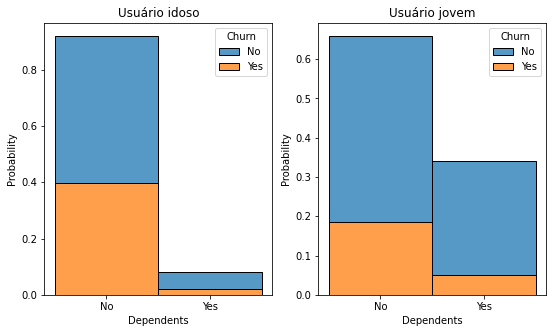

In [28]:
# Primeiro criarei um dataframe somente com as informações dos idosos/jovens 

senior = dfa[dfa['SeniorCitizen'] == 1]
not_senior = dfa[dfa['SeniorCitizen'] == 0]

# Agora voltamos a vizualização das probabilidades de acordo com o Churn

fig2, axs = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=senior, x="Dependents", hue="Churn", stat='probability',
             bins=2, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[0]).set(title='Usuário idoso')
sns.histplot(data=not_senior, x="Dependents", hue="Churn", stat='probability',
             bins=2, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[1]).set(title='Usuário jovem')

plt.show()

Como já era esperado, existe maior chance de pessoas idosas deixarem de usar serviço, mas vemos que os idosos sem dependentes são muito mais propensos a isto. Enquanto para os jovens, não ter dependentes traz a maior probabilidade da pessoa deixar o serviço.

Vale lembrar que ~84% da população não é idosa, logo devemos focar no público jovem para trazer resultados mais significativos para a empresa.

## 2. Tipos de serviços contratados

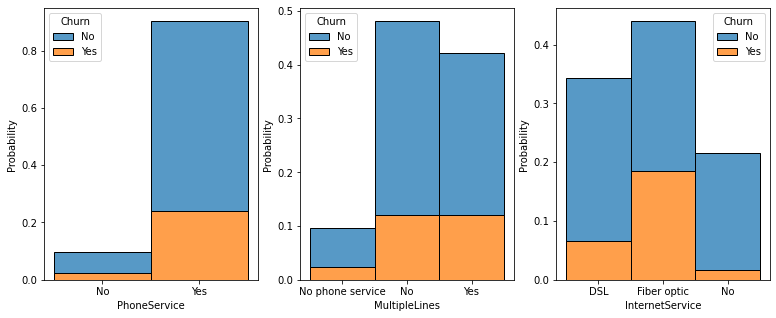

In [12]:
# De forma similar, plotaremos PhoneService, MultipleLines e InternetService para análise

fig3, axs = plt.subplots(1, 3, figsize=(13, 5))

sns.histplot(data=dfa, x="PhoneService", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[0])
sns.histplot(data=dfa, x="MultipleLines", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[1])
sns.histplot(data=dfa, x="InternetService", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[2])

plt.show()

### Observações

1. A chance da pessoa com serviço telefônico deixar o serviço é da ordem de 30%;
2. Ter multiplas linhas aumenta a chance do churn ocorrer e há uma distribuição similar de pessoas com e sem múltiplas linhas;
3. Com praticamente 50% de desistência do serviço, a Fibra ótica é um fator importante a ser trabalhado;
4. Não possuir linha telefônica não tem efeito real sobre a dessistência do serviço, enquanto não possuir Internet, aumenta consideravelmente a possibilidade da pessoa ficar.

Como a observação 4 consiste de somente 10% e 20% do total de usuários considerando os serviços de telefonia e internet respectivamente, não vamos levar a analise destes perfis adiante (não trará resultados significativos para a empresa trabalhar nestes fatores).
Novamente, vamos cruzar as informações para compreender melhor este tipo de usuário.

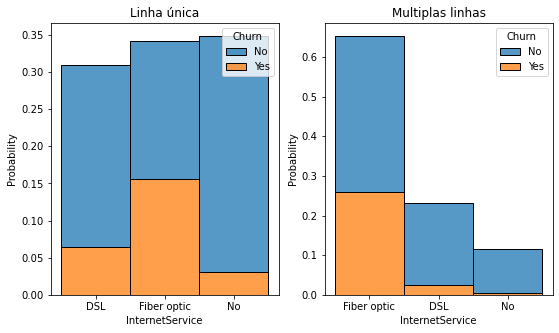

In [13]:
# Vamos utilizar somente os fatores Yes/No de MultipleLines para facilitar o estudo das pessoas com linha telefônica

mult_line = dfa[dfa['MultipleLines'] == 'Yes']
single_line = dfa[dfa['MultipleLines'] == 'No']

fig4, axs = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=single_line, x="InternetService", hue="Churn", stat='probability',
             bins=3, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[0]).set(title='Linha única')
sns.histplot(data=mult_line, x="InternetService", hue="Churn", stat='probability',
             bins=3, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[1]).set(title='Multiplas linhas')

plt.show()

Aqui observamos que ter fibra ótica tem praticamente a mesma interferência para usuários com única ou múltipla linha telefônica. De forma similar, não temos uma diferença significativa para usuários com DSL, logo podemos concluir, que utilizar fibra ótica é crítico na evasão de usúarios.
Curiosamente, 1/3 dos usuários com linha única também não possuem internet.

## 3. Segurança e suporte

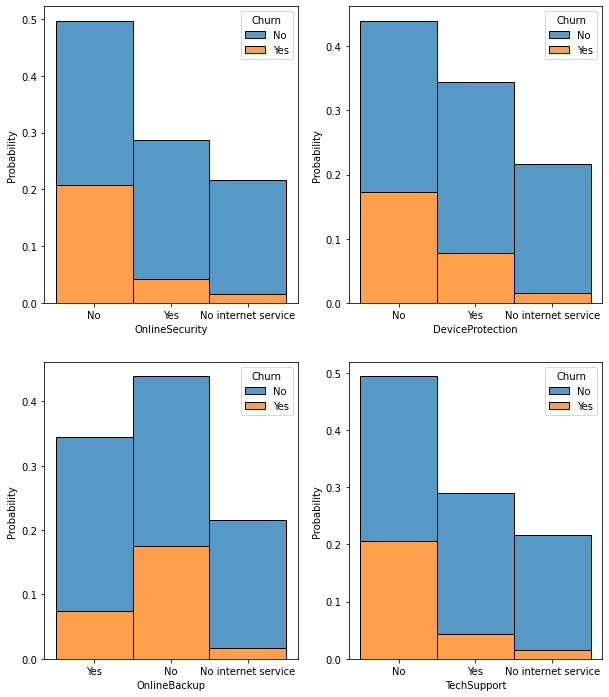

In [14]:
# Agora analisaremos OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport

fig5, axs = plt.subplots(2, 2, figsize=(10, 12))

sns.histplot(data=dfa, x="OnlineSecurity", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[0,0])
sns.histplot(data=dfa, x="OnlineBackup", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[1,0])
sns.histplot(data=dfa, x="DeviceProtection", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[0,1])
sns.histplot(data=dfa, x="TechSupport", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[1,1])

plt.show()

### Observações

Antes de iniciar a observação, vale lembrar que a informação para "No internet service" é idêntica análise anterior (referência aos mesmos clientes).

1. Para os que possuem segurança e suporte (aproximadamente 30% dos usuários), ter segurança online e suporte técnico aumentam as chances de ser cliente, enquanto Backup online e proteção de dispositivo aumentam as chances de deixar de usar o serviço;
2. Aproximadamente 40% dos usuários que não contratam nenhum serviço de segurança e suporte são Churn positivo.

Concluimos com certa segurança que segurança e backup online, proteção de aparelhos e suporte técnico são essenciais para diminuir a evasão dos clientes.

## 4. Serviços de Streaming

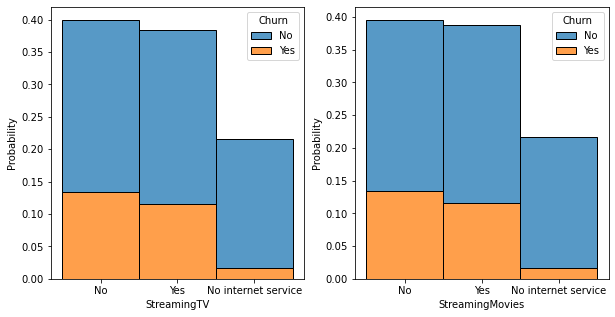

In [15]:
# Agora analisaremos as categorias StreamingTV e StreamingMovies

fig6, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=dfa, x="StreamingTV", hue="Churn", stat='probability',
             bins=3, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[0])
sns.histplot(data=dfa, x="StreamingMovies", hue="Churn", stat='probability',
             bins=3, discrete='bool', multiple="stack",hue_order=['No','Yes'], ax=axs[1])

plt.show()

### Observações

Existe uma probabilidade aproximada de 35% de evasão do usuário quer ele tenha Streaming de TV/filmes, ou não. Logo, este não é um serviço que irá influênciar o consumidor a se manter cliente da companhia no final do dia.

## 5. Informações contratuais e de pagamento

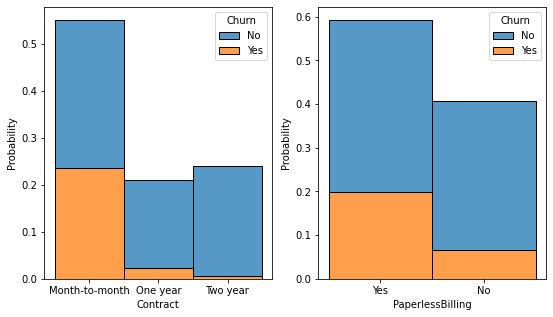

In [16]:
# Analisaremos Contract, PaperlessBilling e PaymentMethod a seguir

fig7, axs = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=dfa, x="Contract", hue="Churn", stat='probability', bins=3, discrete='bool', multiple="stack", ax=axs[0])
sns.histplot(data=dfa, x="PaperlessBilling", hue="Churn", stat='probability', bins=2, discrete='bool', multiple="stack", ax=axs[1])

plt.show()

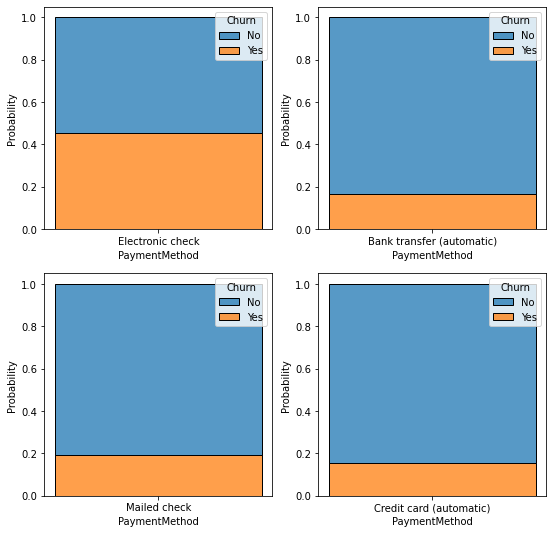

In [17]:
# Para o método de pagamento, a ideia original não funcionou, então precisei criar histogramas para cada tipo de pagamento :(

hist1 = dfa[dfa['PaymentMethod']=='Electronic check']
hist2 = dfa[dfa['PaymentMethod']=='Mailed check']
hist3 = dfa[dfa['PaymentMethod']=='Bank transfer (automatic)']
hist4 = dfa[dfa['PaymentMethod']=='Credit card (automatic)']

fig8, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=hist1, x="PaymentMethod", hue="Churn", stat='probability', bins=1, discrete='bool', multiple="stack", ax=axs[0,0])
sns.histplot(data=hist2, x="PaymentMethod", hue="Churn", stat='probability', bins=1, discrete='bool', multiple="stack", ax=axs[1,0])
sns.histplot(data=hist3, x="PaymentMethod", hue="Churn", stat='probability', bins=1, discrete='bool', multiple="stack", ax=axs[0,1])
sns.histplot(data=hist4, x="PaymentMethod", hue="Churn", stat='probability', bins=1, discrete='bool', multiple="stack", ax=axs[1,1])

plt.show()

## Observações

1. Os contratos de um e dois anos estão desempenhando muito bem, isto mostra que a empresa consegue reter clientes desta categoria com facilidade;
2. Quase 50% dos clientes com contratos mensais deixam o serviço;
3. Há mais pessoas com cobranças sem papel e a probabilidade de sairem é o dobro das que recebem em papel (34% vs 17%);
4. Clientes com cheque eletrônico possuem quase 50% de sair do serviço e são a maioria das pessoas. 

Vale lembrar que de acordo com nossas analises iniciais, existem 2300 (33%) pessoas usando cheque eletrônico enquanto há 1500 (21%) utilizando cada uma das outras categorias.

## 6. Informações financeiras

In [18]:
# Vamos revisar inicialmente os valores e compreender o que temos em termos básicos de estatística

dfa.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Para as três categorias financeiras (tenure, MonthlyCharges e TotalCharges) temos valores bem variados com grande desvio padrão. Deste modo irei verificar se há outliers nos dados que precisam ser tratados.

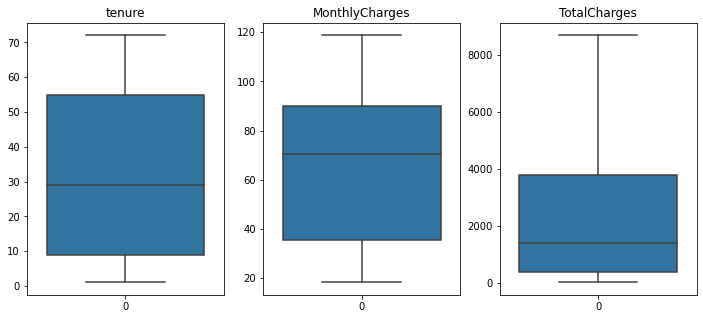

In [19]:
# Utilizando da mesma técnica de subplot, criarei o boxplot de cada característica

fig9, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=dfa['tenure'], ax=axs[0]).set(title='tenure')
sns.boxplot(data=dfa['MonthlyCharges'], ax=axs[1]).set(title='MonthlyCharges')
sns.boxplot(data=dfa['TotalCharges'], ax=axs[2]).set(title='TotalCharges')

plt.show()

Felizmente não há outliers nos dados para nenhuma das categorias em analise. 

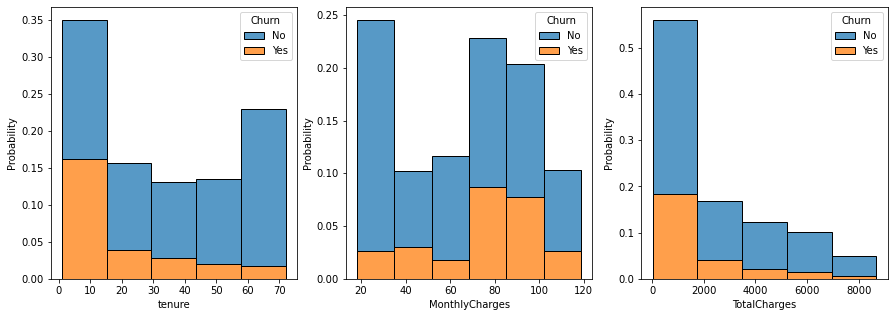

In [20]:
# Retornando a analise costumeira. Utilizaremos de bin = 5 ou 6 para facilitar a compreensão dos dados

fig10, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=dfa, x="tenure", hue="Churn", stat='probability', bins=5, multiple="stack", ax=axs[0])
sns.histplot(data=dfa, x="MonthlyCharges", hue="Churn", stat='probability', bins=6, multiple="stack", ax=axs[1])
sns.histplot(data=dfa, x="TotalCharges", hue="Churn", stat='probability', bins=5, multiple="stack", ax=axs[2])

plt.show()

## Observações

1. O tempo que o cliente está na companhia influência muito na probabilidade dele deixá-la ou não. Esta observação é condizente com as encontradas nas condições de pagamento quanto ao tipo de contrato que o cliente utiliza;
2. Pagar taxas mensais até 40 dólares auxilía na retensão de clientes, enquanto valores entre 70 e 100 dólares torna mais provável que o cliente deixe de utilizar o serviço, sendo esta uma faixa crítica devido a praticamente 45% dos clientes pagarem este valor atualmente;
3. Como a maior evasão ocorre para clientes com pouco tempo de casa, é compreensível que para menores valor total pago, maiores as chances de saída do serviço.

Por via das dúvidas, irei analisar se os clientes que pagam mês a mês possuem o serviço a pouco tempo e/ou estão na faixa crítica de pagamento de contas.

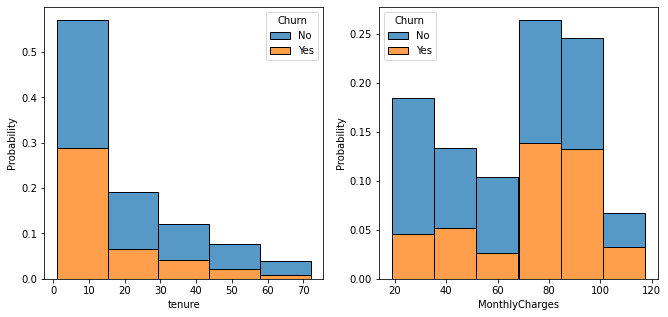

In [21]:
# Separando os dados de contratos mensais e plotando contra tenure/MonthlyCharges

monthly = dfa[dfa['Contract'] == 'Month-to-month']

fig11, axs = plt.subplots(1, 2, figsize=(11, 5))

sns.histplot(data=monthly, x="tenure", hue="Churn", stat='probability', bins=5, multiple="stack", ax=axs[0])
sns.histplot(data=monthly, x="MonthlyCharges", hue="Churn", stat='probability', bins=6, multiple="stack", ax=axs[1])

plt.show()

Novamente corroboramos a hipótese de influência do tempo de casa. Mesmo com contrato mensal, ser cliente a mais tempo diminuí a probabilidade de evasão. De maneira similar, observamos uma vez mais a criticidade das cobranças mensais com valores acima de 70 dólares.
Farei uma análise rápida também dos clientes que usam DSL/Fibra ótica para entender quanto cada perfil paga. De maneira geral, o DSL é mais barato e confiável, enquanto a fibra ótica, por ser uma tecnologia relativamente nova, é mais cara.

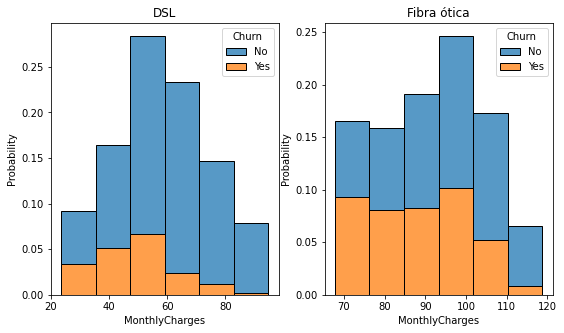

In [23]:
# Criando o dataframe para DSL e Fibra ótica

dsl = dfa[dfa['InternetService'] == 'DSL']
fiber = dfa[dfa['InternetService'] == 'Fiber optic']

fig12, axs = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=dsl, x="MonthlyCharges", hue="Churn", stat='probability',
             bins=6, multiple="stack",hue_order=['No','Yes'], ax=axs[0]).set(title='DSL')
sns.histplot(data=fiber, x="MonthlyCharges", hue="Churn", stat='probability',
             bins=6, multiple="stack",hue_order=['No','Yes'], ax=axs[1]).set(title='Fibra ótica')

plt.show()

Como previsto, os custos da fibra ótica são maiores e encontram-se justamente na faixa crítica de custos mensais. Isto nos leva a concluir que ou o serviço da fibra ótica está deixando a desejar e/ou com problemas, ou há outros players no mercado oferecendo este serviço por preços menores.

Quanto ao DSL, a cobrança entre  30 e 70 dólares aparenta ser mais efetiva do que as abaixo de 30 dólares. Suponho que há uma possível captação de valor a ser trabalhada nesta faixa de preço.

# Identificação de personas

Irei realizar um breve sumário das informações obtidas até então e definar personas de acordo com as características observadas. Em seguida, irei sugerir alguns planos de ações para melhorar os serviços e aumentar na retenção de clientes.

### Clientes felizes 
Os clientes com os serviços contratados são jovens casados e/ou com dependentes e internet DSL. Utilizam dos serviços de segurança e suporte. Estão atrelados a contratos de longa duração, preferem ter suas contas em papel e utilizam de cobrança automática. O serviços lhes custam uma bagatela de 40 dolares.

### Clientes não tão felizes
Os clientes propensos a evasão são jovens solteiros e/ou sem dependentes e idosos com internet de fibra ótica. Sem serviços de segurança e suporte e com contratos mensais. Utilizam de cheque eletrônico como meio de pagamento e contrataram os serviços da telecom a aproximadamente um ano ou menos. Além disto, pagam entre 70 e 100 dólares - caro e sem vantagens!


## Melhorias sugeridas
O nosso estudo nos promoveu clareza quanto ao perfil de cliente que se mantém fiel a companhia e aqueles que estão mais propensos a evasão. Agora nos resta traçar planos de ações para lidar com estas informações e trazer resultados factivéis.

Primeiramente voltarei a pontuar que os dados demográficos não demonstraram grandes diferenças entre os públicos, mas jovens sem dependentes e/ou solteiros são o público alvo a ser levado em consideração uma vez que são a maioria numérica. Como ainda há grande evasão de idosos, é sugerido olhar para este público com cautela caso haja um posicionamento mais voltado a captação de clientes deste mercado. No entanto, a realização de um trade off de público alvo e realização do rebranding da marca para focar no mercado jovem deve ser levado em consideração.

Segundo, o serviço de internet por fibra ótica é no momento uma deficiência real nas ofertas feitas. Seja pelo alto preço, ou por ser um serviço com deficiência técnica. É extremamente recomendado realizar um estudo comparando as ofertas de outros players com a desta companhia para entender qual vantagem está sendo ofertada no mercado, assim como a realização de uma reforma técnica da fibra para garantir um melhor serviço ao cliente.

Terceiro, compreendemos que existe uma importância chave na permanência do usuário de acordo com a utilização de serviços de segurança e suporte, principalmente a segurança online e suporte técnico. Como plano de ação, sugiro ofertar estes dois serviços, pelo menos, para todos os clientes como forma de fidelização e melhoria da experiência do usuário aos produtos da companhia. A compensação financeira ocorreria com o aumento do valor de vida do cliente.

Quarto, meio de pagamentos digitais é sempre bem vindo, tanto para empresas quanto para clientes, pois além de diminuir os custos diretos das transações, é muito mais fácil de se utilizar trazendo melhor experiência ao cliente. No entanto os cheques eletrônicos, aparentam estar facilitando a tomada de decisão de deixar de utilizar os serviços contratados também. Isto em conjunto com contratos mensais tornam o cliente distante e facilita sua movimentação para experimentar outros players caso esteja insatisfeito com o que está recebendo.

Devido a esta facilidade de movimentação, sugiro criar planos trimestrais e semestrais em substituição dos contratos mensais para incentivar que o cliente tente utilizar dos serviços de suporte técnico, por exemplo, para resolver seus problemas e realmente tenha chances de se encantar, assim como os clientes mais antigos da empresa. Além disto, identificar se está ocorrendo algum problema técnico com os cheques eletrônicos pode vir a ser útil - não queremos tirar a modalidade preferida dos usuários, mas sim compreender o porquê este meio de pagamento está sendo tão problemático.

Finalmente, os valores cobrados pelo serviço de fibra ótica tornam o cliente sucetível a evasão, mas não é possível distinguir neste momento se o problema é a fibra, o valor, ou ambos. Um estudo aprofundado destes fatores deve ser realizado.

Gostaria de comentar também sobre o uso de streaming de TV e filme. Como vimos, ter ou não ter algum destes serviços, não altera na probabilidade de evasão do cliente (35% para ambos os casos), logo, deixar de oferecer estes serviços para diminuir os gastos e ofertar a fibra ótica/DSL com valores mais acessíveis é uma oportunidade de redução de custos.

De maneira similar, a presença de linhas telefônicas (única ou múltiplas) também não altera na probabilidade do cliente permanecer ou não, se mantendo próximo de 30% em todos os casos. Aqui existe outra oportunidade de redução de custos ao deixar de oferecer um serviço que não afeta diretamente na retenção do cliente (ou afeta muito pouco).

No entanto, caso opte-se por manter os serviços telefônico e de streaming, sugiro a reestruturação do serviço oferecido a fim de torná-lo melhor e ser um diferencial estratégico para a companhia, não somente um serviço extra a ser ofertado porquê outros players também o fazem.